In [1]:
%pip install kmeans_pytorch


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 코드 11-1 라이브러리 호출
import pandas as pd
from sklearn.model_selection import (
    train_test_split,
)  # 데이터셋을 분리할 때 사용하기 위한 라이브러리
import torch
from kmeans_pytorch import kmeans, kmeans_predict  # K-평균 군집화 사용

In [3]:
# 코드 11-2 데이터셋 불러오기
df = pd.read_csv("../chap11/data/iris.csv")
df.info()  # 데이터셋에 대한 전반적인 정보를 출력
print("------------------------------------------")
print(df)  # 아이리스 데이터셋의 데이터 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
------------------------------------------
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...           

In [4]:
# 코드 11-3 워드 임베딩
data = pd.get_dummies(df, columns=["Species"])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False,True
146,147,6.3,2.5,5.0,1.9,False,False,True
147,148,6.5,3.0,5.2,2.0,False,False,True
148,149,6.2,3.4,5.4,2.3,False,False,True


In [5]:
# 코드 11-4 데이터셋 분리
from sklearn.model_selection import train_test_split

x, y = train_test_split(data, test_size=0.2, random_state=123)

In [6]:
# 코드 11-5 GPU 사용하도록 설정
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

In [7]:
# 코드 11-6 특성 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit(data).transform(x)  # ①
y_scaled = scaler.fit(y).transform(y)

In [8]:
# 코드 11-7 데이터를 텐서로 변경
x = torch.from_numpy(X_scaled)  # ①
y = torch.from_numpy(y_scaled)

In [9]:
# 코드 11-8 훈련과 테스트 데이터셋 크기
print(x.size())  # 훈련 데이터셋에 대한 크기
print(y.size())  # 테스트 데이터셋에 대한 크기
print(x)  # 텐서로 변경된 훈련 데이터셋의 데이터 확인

torch.Size([120, 8])
torch.Size([30, 8])
tensor([[ 1.2817e+00,  1.8862e+00, -5.8776e-01,  1.3314e+00,  9.2206e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [ 1.0277e+00,  1.8983e-01, -1.9762e+00,  7.0589e-01,  3.9617e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.0508e+00, -1.3854e+00,  3.3785e-01, -1.2275e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-1.7205e+00, -9.0068e-01,  1.0321e+00, -1.3413e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-2.8868e-01,  1.8983e-01, -1.9762e+00,  1.3724e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 4.2725e-01, -1.0218e+00, -1.7448e+00, -2.6082e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 1.3048e+00,  2.4920e+00,  1.7263e+00,  1.5020e+00,  1.0535e+00,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.6051e+00, -5.3718e-01,  1.9577e+00, -1.1707e+00, -1.0500e+00,
          1.4142e+00, -7

In [10]:
# 코드 11-9 K-평균 군집화 적용
num_clusters = 3  # 아이리스(붓꽃) 유형이 세 개라서 3으로 지정
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance="euclidean", device=device
)  # ①

running k-means on cuda:0..


[running kmeans]: 3it [00:00, 177.24it/s, center_shift=0.000000, iteration=3, tol=0.000100]


In [11]:
# 코드 11-10 클러스터 ID와 클러스터 중심에 대한 값 확인
print(cluster_ids_x)
print(cluster_centers)

tensor([1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2,
        2, 2, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 0,
        1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2,
        2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2,
        0, 2, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1])
tensor([[-1.1850, -1.0022,  0.8757, -1.3028, -1.2384,  1.4142, -0.7071, -0.7071],
        [ 1.1509,  0.9013, -0.2199,  1.0354,  1.0906, -0.7071, -0.7071,  1.4142],
        [-0.0063,  0.1292, -0.6246,  0.2742,  0.1631, -0.7071,  1.4142, -0.7071]])


In [12]:
# 코드 11-11 K-평균 군집화 예측
cluster_ids_y = kmeans_predict(
    y, cluster_centers, "euclidean", device=device
)  # 예측을 위해서는 kmeans_predict( )를 사용

predicting on cuda:0..


In [13]:
# 코드 11-12 테스트 데이터셋에 대한 클러스터 ID
print(cluster_ids_y)

tensor([2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 0])


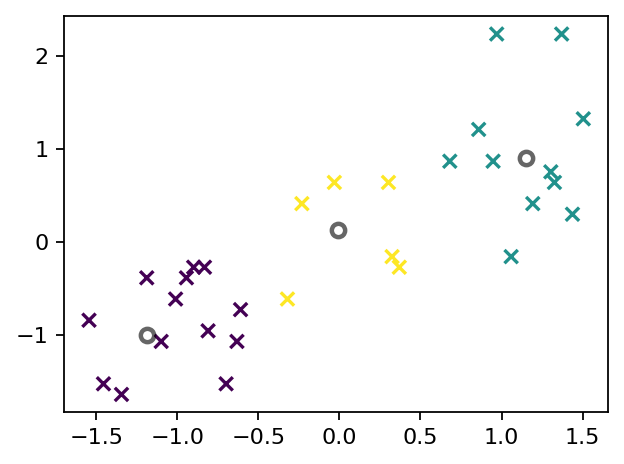

In [14]:
# 코드 11-13 예측 결과 그래프로 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(
    y[:, 0], y[:, 1], c=cluster_ids_y, cmap="viridis", marker="x"
)  # 테스트 데이터셋에 적용된 클러스터 결과 출력

plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    c="white",
    alpha=0.6,
    edgecolors="black",
    linewidths=2,
)

plt.tight_layout()  # ①
plt.show()